<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-04-28 20:04:35
-------------------
qualified stocks: 93
with latest results: 87
still star stocks: 46
-------------------
Initial Investment:  1.10 C
CY Investment:  1.37 C
Reserve:  2.00 K
Current:  1.18 C
-------------------
Today PnL: 87.76 K (0.75%)
Current PnL: -19.69 L (-14.37%)
CY Booked + Current PnL: -18.15 L (-13.25%)
-------------------
Total profit:  4.05 L
Total loss:  -23.74 L
-------------------
Total Booked + Current PnL: 8.83 L (8.02%)
Total Booked PnL: 28.52 L (25.91%)
Curr Year Booked PnL: 1.54 L (1.31%)
Prev Year Booked PnL: 26.98 L (24.52%)
Est FTT:  1.96 C
Est FTT PnL: 78.47 L (66.74%)
-------------------
Est LTT:  2.57 C
Est LTT PnL: 1.39 C (118.26%)
Deployed:  1.10 C
Current:  1.18 C
CAGR/XIRR %: 4.73%


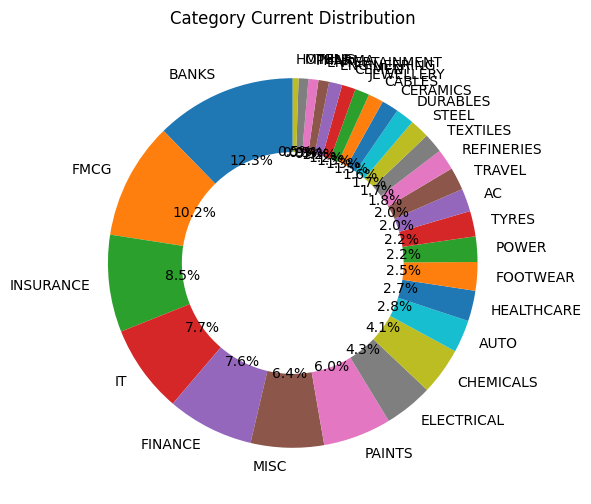

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k) - set( list_x40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
71,SBIN,760.30,863.00,-16.89,M-LC,58.06,216598.0,15118.0,12108.0,2.34,...,5.59,13.51,93.0,1.25,1.84,18.66,XY25,NTT,LC,BANKS
32,HDFCBANK,1561.04,2170.00,4.17,X-LC,49.46,101771.0,19036.0,13240.0,0.47,...,13.01,39.01,4.0,1.44,0.87,34.47,X40,BTT,LC,BANKS
70,SBILIFE,1496.49,1924.99,-1.70,H-LC,83.87,145832.0,20127.0,15867.0,2.42,...,10.88,28.63,NaN,1.27,1.24,29.92,AR,ATH,LC,INSURANCE
24,DMART,3484.00,5112.00,-15.24,X-LC,65.59,104803.0,21187.0,17890.0,-0.19,...,17.07,46.73,33.0,1.18,0.89,28.29,AR,NTT,LC,FMCG
36,ICICIGI,1852.76,2268.71,-18.15,H-MC,38.71,99911.0,-138.0,22600.0,-0.21,...,22.62,22.45,52.0,-0.01,0.85,21.22,X40,ATH,MC,INSURANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,RBLBANK,230.61,388.00,-2.40,M-SC,93.55,210414.0,-23886.0,183797.0,10.11,...,87.35,68.25,-48.0,-0.13,1.79,38.57,XY24,NTT,SC,BANKS
64,REPCOHOME,515.07,880.00,-13.82,H-SC,94.62,159339.0,-45659.0,190904.0,1.77,...,119.81,70.85,-44.0,-0.24,1.36,28.63,XY24,NTT,SC,FINANCE
66,SAIL,130.64,228.00,77.10,M-MC,26.88,201078.0,-23884.0,191547.0,1.71,...,95.26,74.53,-18.0,-0.12,1.71,16.75,XY24,BTT,MC,STEEL
11,BANDHANBNK,214.25,400.00,-29.37,H-SC,84.95,190542.0,-57988.0,273466.0,-0.72,...,143.52,86.70,-29.0,-0.21,1.62,26.05,XY24,NTT,SC,BANKS


In [5]:
# High quality (X40 + X5K) allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
4,ADANIPORTS,1103.69,1583.00,-6.22,M-LC,35.48,165756.0,14550.0,51119.0,1.42,...,30.84,43.43,NaN,0.28,1.41,14.89,XY24,NTT,LC,MISC
7,ASIANPAINT,2961.56,4250.00,-27.31,X-LC,46.24,166750.0,-34636.0,122244.0,0.85,...,73.31,43.51,-18.0,-0.28,1.42,15.01,X40,BTT,LC,PAINTS
12,BANKINDIA,112.90,190.00,-25.80,M-MC,74.19,105121.0,4866.0,63598.0,2.68,...,60.50,68.29,-12.0,0.08,0.89,31.02,XR,NTT,MC,BANKS
13,BATAINDIA,1550.24,2096.00,-32.61,M-SC,18.28,101218.0,-27452.0,72745.0,0.72,...,71.87,35.20,-8.0,-0.38,0.86,3.27,X40,NTT,SC,FOOTWEAR
14,BERGEPAINT,558.54,680.00,-19.95,H-MC,75.27,175475.0,-1582.0,40078.0,0.19,...,22.84,21.75,-14.0,-0.04,1.49,25.52,XY24,NTT,MC,PAINTS
21,COLPAL,2837.00,3808.06,10.16,X-MC,87.10,134725.0,-7125.0,55682.0,0.86,...,41.33,34.23,-21.0,-0.13,1.15,14.64,X40,ATH,MC,FMCG
22,DABUR,505.20,735.00,-14.56,X-LC,6.45,188058.0,-8970.0,98599.0,-0.50,...,52.43,45.49,1.0,-0.09,1.60,6.82,XY24,BTT,LC,FMCG
27,GICRE,335.06,583.00,5.49,H-MC,29.03,187058.0,40637.0,67715.0,0.01,...,36.20,74.00,109.0,0.60,1.59,36.80,XY24,BTT,MC,INSURANCE
31,HAVELLS,1595.53,2077.12,2.11,X-LC,51.61,186714.0,1633.0,54240.0,0.61,...,29.05,30.18,NaN,0.03,1.59,14.39,X40,ATH,LC,ELECTRICAL
32,HDFCBANK,1561.04,2170.00,4.17,X-LC,49.46,101771.0,19036.0,13240.0,0.47,...,13.01,39.01,4.0,1.44,0.87,34.47,X40,BTT,LC,BANKS


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
3,ACC,2579.05,3906.0,-39.80,M-MC,15.05,140532.0,-47739.0,144607.0,-0.67,...,102.90,51.45,-37.0,-0.33,1.20,5.86,XY24,BTT,MC,CEMENT
4,ADANIPORTS,1103.69,1583.0,-6.22,M-LC,35.48,165756.0,14550.0,51119.0,1.42,...,30.84,43.43,NaN,0.28,1.41,14.89,XY24,NTT,LC,MISC
9,ATULAUTO,624.44,844.0,-37.03,M-SC,81.72,116124.0,-31244.0,83063.0,-0.58,...,71.53,35.16,-49.0,-0.38,0.99,18.61,XY24,NTT,SC,AUTO
10,AWL,361.39,485.0,-67.50,H-MC,68.82,143814.0,-42302.0,105962.0,1.93,...,73.68,34.20,-36.0,-0.40,1.22,18.45,XY24,NTT,MC,FMCG
11,BANDHANBNK,214.25,400.0,-29.37,H-SC,84.95,190542.0,-57988.0,273466.0,-0.72,...,143.52,86.70,-29.0,-0.21,1.62,26.05,XY24,NTT,SC,BANKS
14,BERGEPAINT,558.54,680.0,-19.95,H-MC,75.27,175475.0,-1582.0,40078.0,0.19,...,22.84,21.75,-14.0,-0.04,1.49,25.52,XY24,NTT,MC,PAINTS
17,CAMPUS,294.86,393.0,-34.31,M-SC,54.30,138478.0,-29297.0,85136.0,0.32,...,61.48,33.28,-16.0,-0.34,1.18,7.21,XY24,NTT,SC,FOOTWEAR
22,DABUR,505.20,735.0,-14.56,X-LC,6.45,188058.0,-8970.0,98599.0,-0.50,...,52.43,45.49,1.0,-0.09,1.60,6.82,XY24,BTT,LC,FMCG
25,EASEMYTRIP,18.12,26.4,-13.86,M-SC,24.73,115047.0,-61768.0,142566.0,0.00,...,123.92,45.70,-91.0,-0.43,0.98,6.79,XY24,NTT,SC,TRAVEL
27,GICRE,335.06,583.0,5.49,H-MC,29.03,187058.0,40637.0,67715.0,0.01,...,36.20,74.00,109.0,0.60,1.59,36.80,XY24,BTT,MC,INSURANCE


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
1,AARTIIND,487.04,919.00,16.93,M-SC,78.49,72420.0,-8916.0,81052.0,1.10,...,111.92,88.69,-8.0,-0.11,0.62,22.12,XR,NTT,SC,CHEMICALS
2,ABB,5319.37,9007.77,-39.00,H-LC,16.13,138400.0,5416.0,86791.0,0.67,...,62.71,69.34,NaN,0.06,1.18,12.17,AR,ATH,LC,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-13.60,X-SC,77.42,77194.0,-23769.0,119211.0,-0.73,...,154.43,94.53,-59.0,-0.20,0.66,14.45,SR,ATH,SC,CHEMICALS
8,ASIANTILES,75.41,137.00,271.79,M-SC,33.33,54798.0,-39012.0,115629.0,-0.36,...,211.01,81.67,-16.0,-0.34,0.47,6.12,XR,NTT,SC,CERAMICS
12,BANKINDIA,112.90,190.00,-25.80,M-MC,74.19,105121.0,4866.0,63598.0,2.68,...,60.50,68.29,-12.0,0.08,0.89,31.02,XR,NTT,MC,BANKS
15,BRITANNIA,4905.19,6446.05,10.12,X-LC,73.12,217152.0,20944.0,40694.0,0.15,...,18.74,31.41,239.0,0.51,1.85,18.66,AR,ATH,LC,FMCG
16,BSOFT,628.85,844.81,-27.58,M-SC,23.66,68250.0,-41799.0,79593.0,1.02,...,116.62,34.34,-28.0,-0.53,0.58,12.36,XR,ATH,SC,IT
18,CAMS,3643.00,5250.99,-0.66,H-SC,56.99,110435.0,8431.0,36598.0,0.15,...,33.14,44.14,261.0,0.23,0.94,29.32,XR,ATH,SC,MISC
20,COFFEEDAY,59.14,80.00,-128.17,L-SC,70.97,59155.0,-54394.0,94447.0,1.99,...,159.66,35.27,NaN,-0.58,0.50,44.78,XR,NTT,SC,HOTELS
23,DEN,52.79,75.00,-37.39,L-SC,50.54,52512.0,-31952.0,67488.0,-0.36,...,128.52,42.07,-21.0,-0.47,0.45,11.52,AR,NTT,SC,ENTERTAINMENT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,18.66
1,20,34.37
2,30,47.76


In [9]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,38.23
X40,15.42
X40N,12.91
AR,12.29
XY25,9.59
XR,9.25
SR,1.21
X200,1.14


In [10]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-LC,20.17
H-SC,19.50
M-SC,18.54
M-MC,7.63
H-MC,7.57
M-LC,6.83
H-LC,6.49
X-MC,6.47
X-SC,2.65


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.96
          M-SC          8.88
X40       X-LC          8.71
XY25      X-LC          5.36
XY24      M-MC          5.19
          M-LC          4.99
X40N      H-SC          4.96
XY24      H-MC          4.30
X40N      M-SC          3.91
AR        X-LC          3.36
XR        H-SC          3.25
          M-SC          2.90
AR        H-LC          2.42
          X-MC          2.22
XY25      M-LC          1.84
X40       M-SC          1.78
          H-MC          1.70
XY24      X-LC          1.60
          X-MC          1.55
X40N      X-MC          1.55
XY25      H-LC          1.53
AR        H-SC          1.46
X40N      H-LC          1.33
X40       H-LC          1.21
AR        H-MC          1.17
X40N      X-SC          1.16
X40       X-MC          1.15
X200      X-LC          1.14
XR        L-SC          0.98
XY24      L-SC          0.96
XR        M-MC          0.89
X40       H-SC          0.87
XY25      M-MC          0.86
XR        X-SC          0.83
AR        M-MC          0.69
SR        X-SC          0.66
          M-SC          0.55
AR        M-SC          0.52
          L-SC          0.45
XR        H-MC          0.40
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,12.32,-7.73,59.69
FMCG,10.23,-0.77,31.99
INSURANCE,8.50,4.01,34.68
IT,7.71,-33.67,100.88
FINANCE,7.57,-24.40,80.54
MISC,6.41,-36.99,86.56
PAINTS,5.96,-17.27,51.97
ELECTRICAL,4.26,-18.17,68.25
CHEMICALS,4.13,-11.39,84.79


In [13]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,73.56,8645474.0,-10.88,-940622.0,55.69,4815023.0


In [14]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,34.8,4091380.0,1.03,41966.0,35.3,1444369.0


In [15]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3188406.0
X40N,1219792.0
XR,1149702.0
AR,1055733.0
X40,779714.0
SR,203142.0
XY25,167758.0
X200,83264.0


In [16]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2224907.0
M-SC,2184975.0
X-LC,872142.0
M-MC,646922.0
H-MC,397997.0
X-SC,365210.0
L-SC,316877.0
X-MC,259645.0
M-LC,252701.0


In [17]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1012771.0
          H-SC           938900.0
X40N      H-SC           549505.0
XY24      M-MC           463421.0
XR        M-SC           446174.0
X40       X-LC           414797.0
AR        H-SC           394743.0
X40N      M-SC           377754.0
XR        H-SC           292696.0
XY24      M-LC           240593.0
          H-MC           213755.0
AR        X-LC           184919.0
X40       M-SC           169058.0
XR        L-SC           163969.0
          X-SC           128009.0
X40N      X-MC           120121.0
SR        X-SC           119211.0
X40N      X-SC           117990.0
AR        H-LC           102658.0
XY24      X-LC            98599.0
AR        M-SC            95287.0
          M-MC            94980.0
XY25      X-LC            90563.0
XY24      L-SC            85420.0
SR        M-SC            83931.0
X200      X-LC            83264.0
AR        H-MC            75106.0
          L-SC            67488.0
XR        M-MC            63598.0
X40       X-MC            55682.0
XR        H-MC            55256.0
X40N      H-LC            54422.0
X40       H-MC            53880.0
          H-SC            49063.0
XY24      X-MC            43290.0
AR        X-MC            40552.0
XY25      H-LC            40164.0
X40       H-LC            37234.0
XY25      M-MC            24923.0
          M-LC            12108.0
Name: FTT Amt, dtype: float64

In [18]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,22
H-SC,19
X-LC,14
M-MC,7
H-MC,7
H-LC,5
X-MC,5
M-LC,5
X-SC,4
